# Implementando Regressão Linear do Zero

### Descrição

Nessa tarefa você vai programar regressão linear simples do zero em python. 

e seguir o passo a passo da implementação. Embora o código esteja disponível no github do autor (Links para um site externo)Links para um site externo do vídeo, é importante que você digite o código enquanto assiste. Vários estudos já mostraram que aprendemos melhor dessa forma do que somente assistindo. Teste o programa nos dados também fornecidos no github do autor.

Feito isso,  a sua tarefa agora é a seguinte:

1. Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna). Baixe os dados aquiVisualizar o documento. Esse exemplo foi trabalhado em sala de aula. 

2. Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente.

3. O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações? Plote o RSS vs número de iterações.

4. Teste valores diferentes do número de iterações e learning_rate até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.

5. O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de parada que é relacionado ao tamanho do gradiente (como no algoritmo apresentado em sala). Plote o tamanho do gradiente vs número de iterações.

6. Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?

7. Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.

## 1. Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna)

In [205]:
from numpy import *  

In [206]:
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("income.csv", delimiter=",")
    # hyperparamets
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...?")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...?
After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 103.39842291729676


## 2. Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente.

In [207]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        print("Iteração = {0}, RSS = {1}".format(i, compute_error_for_line_given_points(b, m, points)))
    return [b, m]

run()

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...?
Iteração = 0, RSS = 2648.2381266261386
Iteração = 1, RSS = 2381.1735926230144
Iteração = 2, RSS = 2142.151013653971
Iteração = 3, RSS = 1928.2259499305476
Iteração = 4, RSS = 1736.7631314659504
Iteração = 5, RSS = 1565.4039948653665
Iteração = 6, RSS = 1412.0376287932477
Iteração = 7, RSS = 1274.7747702022896
Iteração = 8, RSS = 1151.924530990372
Iteração = 9, RSS = 1041.9735683871631
Iteração = 10, RSS = 943.5674424757678
Iteração = 11, RSS = 855.4939311975465
Iteração = 12, RSS = 776.6680973019634
Iteração = 13, RSS = 706.1189232850785
Iteração = 14, RSS = 642.9773496759485
Iteração = 15, RSS = 586.4655693176774
Iteração = 16, RSS = 535.8874457621318
Iteração = 17, RSS = 490.61993774500473
Iteração = 18, RSS = 450.105424101551
Iteração = 19, RSS = 413.8448345756185
Iteração = 20, RSS = 381.3915019021827
Iteração = 21, RSS = 352.34565942878487
Iteração = 22, RSS = 326.34951649348716
Iteração = 23, RSS = 

## 3. O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações? Plote o RSS vs número de iterações.

Verifica-se que ao longo das iterações o RSS vai diminuindo até estabilizar próximo a 103.

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...?
After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 103.39842291729676


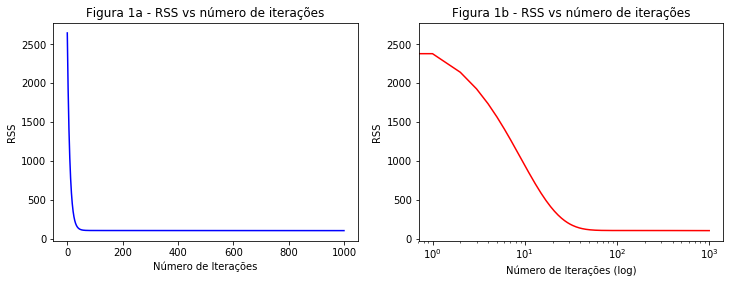

In [208]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    x = []
    y = []
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        x.append(i)
        y.append(compute_error_for_line_given_points(b, m, points))
    

    %matplotlib inline
    import matplotlib.pyplot as plt

   # Plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(x, y, 'b')
    axes[0].set_xlabel('Número de Iterações') 
    axes[0].set_ylabel('RSS')
    axes[0].set_title('Figura 1a - RSS vs número de iterações')
    
    axes[1].plot(x, y, 'r')
    axes[1].set_xscale('log')
    axes[1].set_xlabel('Número de Iterações (log)') 
    axes[1].set_ylabel('RSS')
    axes[1].set_title('Figura 1b - RSS vs número de iterações')
    
    return [b, m]

run()

## 4. Teste valores diferentes do número de iterações e learning_rate até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.

* Testes

Iterations = 471757, w0 = -39.00000268213978, w1 = 5.57291828520959, learning_rate = 0.0001

Iterations = 235878, w0 = -39.000007959090105, w1 = 5.572918599335665, learning_rate = 0.0002

Iterations = 157252, w0 = -39.00000474782655, w1 = 5.572918408175704, learning_rate = 0.0003

Iterations = 94351, w0 = -39.00001105781903, w1 = 5.572918783796668, learning_rate = 0.0005

Iterations = 52417, w0 = -39.00002367825857, w1 = 5.572919535065655, learning_rate = 0.0009

Iterations = 31450, w0 = -39.00004261005531, w1 = 5.572920662036844, learning_rate = 0.0015

Iterations = 15725, w0 = -39.00012177355754, w1 = 5.57292537447843, learning_rate = 0.003

Iterations = 13478, w0 = -39.0000632854651, w1 = 5.572921892801757, learning_rate = 0.0035

Iterations = 12748, w0 = -39.00000168530747, w1 = 5.572918225870199, learning_rate = 0.0037


In [209]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate):
    b = starting_b
    m = starting_m
    w0 = -39
    w1= 5
    num_iterations = 0
    
    while not (round(b,10) <= w0 and round(m,10) >= w1 ): 
        num_iterations += 1
        b, m = step_gradient(b, m, array(points), learning_rate)
   #     print("Iterations = {0}, w0 = {1}, w1 = {2}, learning_rate = {3}".format(num_iterations, b, m, learning_rate))

    return [b, m, num_iterations]

def run4():
    points = genfromtxt("income.csv", delimiter=",")
    # hyperparamets
    learning_rate = 0.0037
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...?")
    [b, m, num_iterations] = gradient_descent_runner(points, initial_b, initial_m, learning_rate)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

if __name__ == '__main__':
    run4()

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...?
After 12748 iterations b = -39.00000168530747, m = 5.572918225870199, error = 29.83831956445486


## 5. O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de parada que é relacionado ao tamanho do gradiente (como no algoritmo apresentado em sala). Plote o tamanho do gradiente vs número de iterações.

Utilizou-se como critério de parada o coeficiente linear

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...?
After 12748 iterations b = -39.00000168530747, m = 5.572918225870199, error = 29.83831956445486


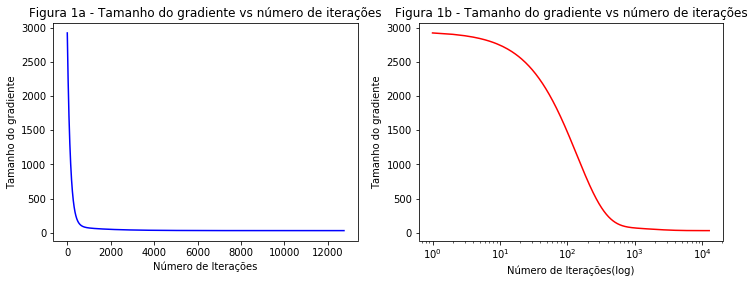

In [210]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate):
    b = starting_b
    m = starting_m
    w0 = -39
    w1 = 5
    num_iterations = 0
    x = []
    y = []
# Considerando o coeficiente linear como critério de parada    
    while not (round(b,10) <= w0 and round(m,10) >= w1 ):
        num_iterations += 1
        b, m = step_gradient(b, m, array(points), learning_rate)
        x.append(num_iterations)
        y.append(compute_error_for_line_given_points(b, m, points))

# Plot 
    %matplotlib inline
    import matplotlib.pyplot as plt

    fig2, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(x, y, 'b')
    axes[0].set_xlabel('Número de Iterações') 
    axes[0].set_ylabel('Tamanho do gradiente')
    axes[0].set_title('Figura 1a - Tamanho do gradiente vs número de iterações')
    
    axes[1].plot(x, y, 'r')
    axes[1].set_xscale('log')
    axes[1].set_xlabel('Número de Iterações(log)') 
    axes[1].set_ylabel('Tamanho do gradiente')
    axes[1].set_title('Figura 1b - Tamanho do gradiente vs número de iterações')
# - 

    return [b, m, num_iterations]


def run5():
    points = genfromtxt("income.csv", delimiter=",")
    # hyperparamets
    learning_rate = 0.0037
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...?")
    [b, m, num_iterations] = gradient_descent_runner(points, initial_b, initial_m, learning_rate)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

if __name__ == '__main__':
    run5()
    


## 6. Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?

In [211]:
import time 

def gradient_descent_runner(points, starting_b, starting_m, learning_rate):
    b = starting_b
    m = starting_m
    w0 = -39
    w1 = 5
    num_iterations = 0

# Considerando o coeficiente linear como critério de parada    
    while not (round(b,10) <= w0 and round(m, 10) >= w1): 
        num_iterations += 1
        b, m = step_gradient(b, m, array(points), learning_rate)
 
    print("Após {0} iterações b = {1}, m = {2}, erro = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

    return [b, m, num_iterations]

def run6():
    points = genfromtxt("income.csv", delimiter=",")
    # hyperparamets
    learning_rate = 0.002
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    print("Running...?")
    [b, m, num_iterations] = gradient_descent_runner(points, initial_b, initial_m, learning_rate)

# Tempo Inicial
t1 = time.time()

run6()
# Tempo final
t2 = time.time()
# Tempo de execução
t_exec = t2-t1
print("Tempo de execução = {0}".format(t_exec)) 

Running...?
Após 23586 iterações b = -39.000026556543794, m = 5.572919706404095, erro = 29.8383185051777
Tempo de execução = 1.0219066143035889


## 7. Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.

In [212]:
# Regressão linear simples
def RegSimples(points):
    tmp_x = 0
    tmp_y = 0
    N = len(points)
    a = 0
    b = 0
    
    for i in range(0, N):
        x1 = points[i, 0]
        y1 = points[i, 1]
        tmp_x += x1
        tmp_y += y1

    x = tmp_x / float(N)
    y = tmp_y / float(N)

    for i in range(0, N):
        x2 = points[i, 0]
        y2 = points[i, 1]
        a = a + (x1 - x) * (y1 - y)
        b = b + (x1 - x)**2
        
    w1 = a/b
    w0 = y - w1*x
    return [w0,w1]

def run_q7():
    points = genfromtxt("income.csv", delimiter=",")

    print("Running...")
     
    [a, b] = RegSimples(points)
    
    print("w0 = {0}, w1 = {1}, error = {2}".format(a, b, compute_error_for_line_given_points(a, b, points)))

    return [a,b]

t1 = time.time()
run_q7()
t2 = time.time()
t_exec = t2-t1
print("Tempo de execução = {0}".format(t_exec))

Running...
w0 = -30.161467210721675, w1 = 5.019183532346513, error = 34.148888021867066
Tempo de execução = 0.0020372867584228516
